# Importações

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação da base de dados

In [58]:
deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [59]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223


# Exploração dos dados


In [60]:
confirmed.set_index('Province/State')

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
Province/State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226
NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067


In [61]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223


In [62]:
confirmed_by_country.loc["China"][2:]

1/22/20      548.0
1/23/20      643.0
1/24/20      920.0
1/25/20     1406.0
1/26/20     2075.0
            ...   
11/2/20    91452.0
11/3/20    91478.0
11/4/20    91509.0
11/5/20    91552.0
11/6/20    91591.0
Name: China, Length: 290, dtype: float64

In [63]:
last_date = "11/6/20"

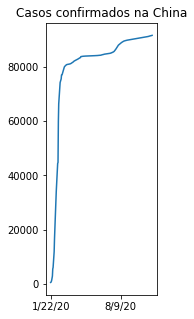

In [64]:
 # Extremamente apertado pequeno sendo longe do adequado ao passar uma mensagem errada

plt.figure(figsize=(2,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

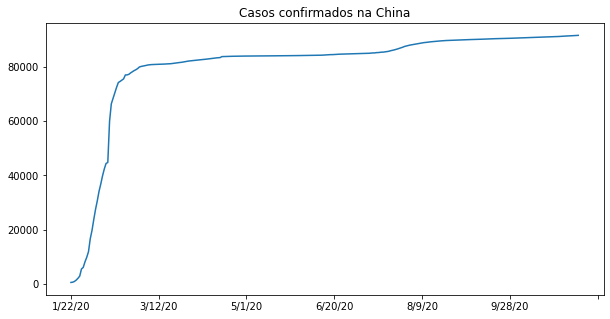

In [65]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

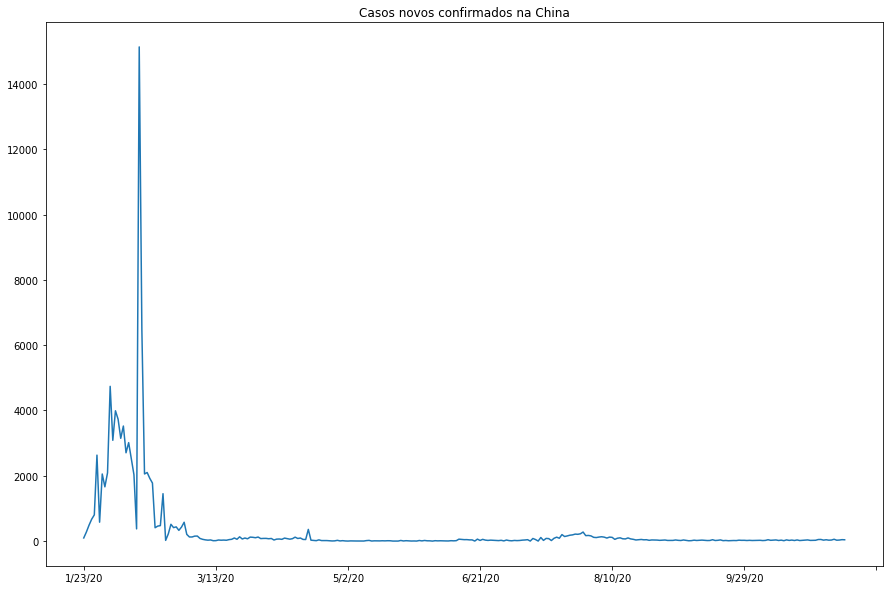

In [66]:
plt.figure(figsize=(15,10))
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
plt.title("Casos novos confirmados na China")
new_cases_china.plot()

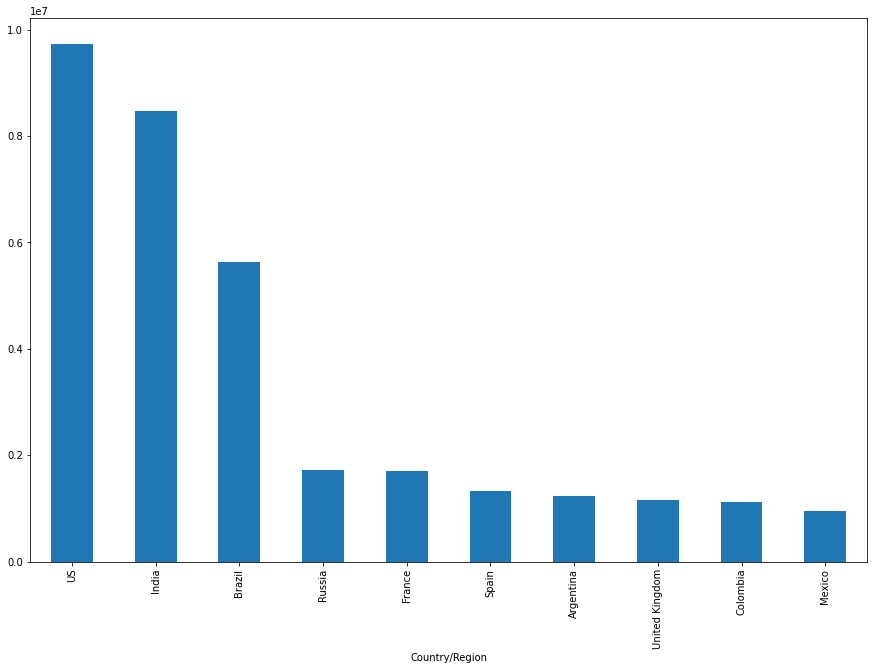

In [67]:
plt.figure(figsize=(15,10))
confirmed_by_country['11/6/20'].sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.show()

In [68]:
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511,1514,1518,1523,1529,1532,1533,1536,1536,1541,1544,1548,1554,1554
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439,443,448,451,454,458,462,465,469,473,477,480,487,493,499,502,509,518,527,532,536,543,549
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907,1914,1922,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59,59,59,59,62,62,63,63,69,69,69,72,72,72,73,75,75,75,75,75,75,75,75
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228,234,241,247,248,251,255,260,265,267,268,270,271,275,275,279,284,286,289,291,296,299,300


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32642,32746,32789,32842,32842,32842,32852,32879,32977,33045,33058,33058,33064,33114,33118,33308,33354,33447,33516,33561,33614,33760,33790,33824,33831,34010,34023,34129,34150,34217,34237,34239,34258,34321,34326,34342,34355,34362,34440,34440
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7629,7732,7847,8077,8342,8536,8675,8825,8965,9115,9215,9304,9406,9500,9585,9675,9762,9864,9957,10001,10071,10167,10225,10341,10395,10466,10548,10654,10705,10808,10893,11007,11097,11189,11246,11367,11473,11578,11696,11861
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35962,36063,36174,36282,36385,36482,36578,36672,36763,36857,36958,37067,37170,37170,37382,37492,37603,37603,37856,37971,38088,38215,38346,38482,38618,38788,38932,39095,39273,39444,39635,39635,40014,40201,40395,40577,40577,41001,41244,41510
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1265,1265,1432,1432,1540,1540,1540,1615,1615,1715,1715,1814,1814,1814,1928,1928,2011,2011,2057,2057,2057,2273,2273,2470,2470,2729,2729,2729,2957,3029,3144,3260,3377,3475,3475,3548,3627,3734,3858,3858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1813,1833,1941,2082,2215,2436,2577,2591,2598,2598,2635,2685,2716,2743,2744,2761,2801,2928,3012,3022,3030,3031,3037,3040,3305,3384,3461,3508,3530,3647,3693,3736,4107,4523,4920,5172,5230,5266,5350,5626


# Analise dos dados


## Taxa de letalidade

In [69]:
def lastest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

lastest_by_country(confirmed)

Country/Region
Afghanistan           41975
Albania               23210
Algeria               60800
Andorra                5135
Angola                12223
                      ...  
West Bank and Gaza    57226
Western Sahara           10
Yemen                  2067
Zambia                16819
Zimbabwe               8471
Name: 11/6/20, Length: 190, dtype: int64

In [70]:
informations = [lastest_by_country(confirmed), lastest_by_country(deaths), lastest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,41975,1554,34440
Albania,23210,549,11861
Algeria,60800,2024,41510
Andorra,5135,75,3858
Angola,12223,300,5626


In [71]:
def lastest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]

informations = [lastest_by_country_at(confirmed, '2/20/20'), lastest_by_country_at(deaths, '2/20/20'), lastest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc['China']
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [72]:
informations = [lastest_by_country_at(confirmed, '2/8/20'), lastest_by_country_at(deaths, '2/20/20'), lastest_by_country_at(recovered, '2/20/20')]
combined_12_dias = pd.concat(informations, axis=1)
combined_12_dias.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12_dias.loc['China']
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]

print(letality_rate_1 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [73]:
# Taxa de letalidade é expressa em %
# O numero de casos letias dentro dos casos que foram letais e não leitas.

sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.5198636728588166
3.68546628056986


In [74]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,41975,1554,34440,3.702204,4.317386
Albania,23210,549,11861,2.365360,4.423852
Algeria,60800,2024,41510,3.328947,4.649240
Andorra,5135,75,3858,1.460565,1.906941
Angola,12223,300,5626,2.454389,5.062437
...,...,...,...,...,...
West Bank and Gaza,57226,511,49537,0.892951,1.021020
Western Sahara,10,1,8,10.000000,11.111111
Yemen,2067,602,1375,29.124335,30.450177


In [75]:
combined.sort_values("letality_rate_1", ascending = False)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
MS Zaandam,9,2,0,22.222222,100.000000
Western Sahara,10,1,8,10.000000,11.111111
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
...,...,...,...,...,...
Eritrea,484,0,429,0.000000,0.000000
Mongolia,357,0,314,0.000000,0.000000
Marshall Islands,1,0,0,0.000000,NaN


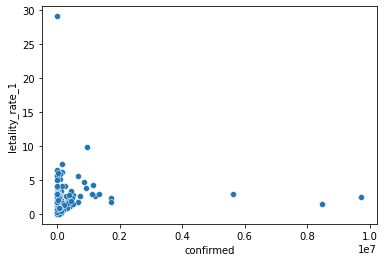

In [76]:
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="letality_rate_1")

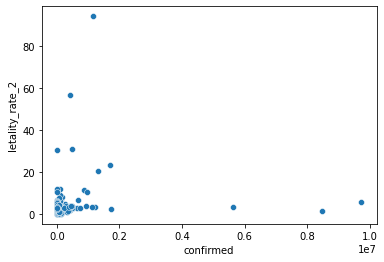

In [77]:
sns.scatterplot(data = combined.query("recovered > 40"), x="confirmed", y="letality_rate_2")

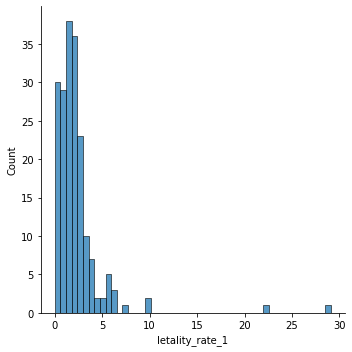

In [78]:
sns.displot(combined["letality_rate_1"])

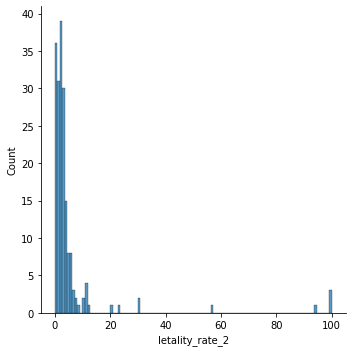

In [79]:
sns.displot(combined["letality_rate_2"])

In [80]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
Chad,1538,99,1362,6.436931,6.776181
Bolivia,142343,8781,113899,6.168902,7.157646
Sudan,13943,837,6764,6.003012,11.011709
Egypt,108754,6343,100106,5.832429,5.958722
Liberia,1442,82,1310,5.686546,5.890805
Iran,663800,37409,509952,5.635583,6.834429


In [81]:
combined.sort_values("letality_rate_1", ascending=False).query("recovered > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,2067,602,1375,29.124335,30.450177
Mexico,955128,94323,812556,9.875430,10.400836
Ecuador,172508,12761,149048,7.397338,7.886459
Chad,1538,99,1362,6.436931,6.776181
Bolivia,142343,8781,113899,6.168902,7.157646
Sudan,13943,837,6764,6.003012,11.011709
Egypt,108754,6343,100106,5.832429,5.958722
Liberia,1442,82,1310,5.686546,5.890805
Iran,663800,37409,509952,5.635583,6.834429
